In [93]:
%matplotlib inline
import pandas as pd
import arrow

data = pd.read_csv('notes_ext.csv')
data.head()

,LoanId,OrderId,PortfolioId,NoteId,PortfolioName,Invested,InterestRate,Grade,LoanType,Term,...,HARDSHIP_PAYOFF_BALANCE_AMOUNT,HARDSHIP_LAST_PAYMENT_AMOUNT,DISBURSEMENT_METHOD,DEBT_SETTLEMENT_FLAG,DEBT_SETTLEMENT_FLAG_DATE,SETTLEMENT_STATUS,SETTLEMENT_DATE,SETTLEMENT_AMOUNT,SETTLEMENT_PERCENTAGE,SETTLEMENT_TERM
0,60920958,84961596,84492089,97190314,Fully Paid,25.0,14.649999999999999%,C5,Personal,60,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,60941574,84961545,84522016,97183486,Loans,25.0,6.890000000000001%,A3,Personal,36,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,60941913,84961545,84522016,97183487,Loans,25.0,9.99%,B3,Personal,36,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,60962692,85048063,103682087,97139869,Charged off,25.0,9.99%,B3,Personal,36,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68495102,96390397,84522016,109544351,Loans,25.0,9.8%,B3,Personal,36,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
for c in data.columns:
    print(c)

LoanId
OrderId
PortfolioId
NoteId
PortfolioName
Invested
InterestRate
Grade
LoanType
Term
PrincipalRemaining
Trend
NoteType
Accrual
PaymentsReceivedToDate
NextPaymentDate
Status
Note Issue Date
OrderDate
LoanStatusDate
Pending Principal Payment
Pending Interest
Purchased
installment
emp_title
emp_length
home_ownership
annual_inc
is_inc_v
accept_d
exp_d
list_d
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
acc_now_delinq
acc_open_past_24mths
bc_open_to_buy
percent_bc_gt_75
bc_util
dti
delinq_2yrs
delinq_amnt
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
mths_since_recent_inq
mths_since_recent_revol_delinq
mths_since_recent_bc
mort_acc
open_acc
pub_rec
total_bal_ex_mort
revol_bal
revol_util
total_bc_limit
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_cred

In [95]:
cols = ['NoteId', 'Note Issue Date', 'Status', 'InterestRate', 'Grade', 'Term', 'PURCHASE_PRINCIPAL',
        'PRINCIPAL_RECEIVED', 'INTEREST_RECEIVED']


In [96]:
filtered = data[cols][(data.Status != 'Issued') & (data.Status != 'Issuing') & (data.Status != 'In Funding')]
filtered.head()

,NoteId,Note Issue Date,Status,InterestRate,Grade,Term,PURCHASE_PRINCIPAL,PRINCIPAL_RECEIVED,INTEREST_RECEIVED
0,97190314,10/05/2015,Fully Paid,14.649999999999999%,C5,60,25,25.000000,1.229859
1,97183486,10/05/2015,Current,6.890000000000001%,A3,36,25,17.531531,2.487103
2,97183487,10/22/2015,Current,9.99%,B3,36,25,16.555461,3.612664
3,97139869,10/05/2015,Charged Off,9.99%,B3,36,25,10.217645,3.313492
4,109544351,01/11/2016,Current,9.8%,B3,36,25,14.400147,3.268113


In [97]:
filtered.columns = ['note_id', 'issue_date', 'status', 'int_rate', 'grade', 'term',
                    'principal', 'principal_received', 'interest_received'
                   ]
filtered.head()

,note_id,issue_date,status,int_rate,grade,term,principal,principal_received,interest_received
0,97190314,10/05/2015,Fully Paid,14.649999999999999%,C5,60,25,25.000000,1.229859
1,97183486,10/05/2015,Current,6.890000000000001%,A3,36,25,17.531531,2.487103
2,97183487,10/22/2015,Current,9.99%,B3,36,25,16.555461,3.612664
3,97139869,10/05/2015,Charged Off,9.99%,B3,36,25,10.217645,3.313492
4,109544351,01/11/2016,Current,9.8%,B3,36,25,14.400147,3.268113


In [98]:
filtered.status.value_counts()

Current              80
Fully Paid           22
Charged Off          12
In Grace Period       2
Late (16-30 days)     2
Name: status, dtype: int64

In [99]:
filtered.issue_date = pd.to_datetime(filtered.issue_date)

In [100]:
filtered['balance'] = filtered.principal - filtered.principal_received
filtered.head()

,note_id,issue_date,status,int_rate,grade,term,principal,principal_received,interest_received,balance
0,97190314,2015-10-05,Fully Paid,14.649999999999999%,C5,60,25,25.000000,1.229859,0.000000
1,97183486,2015-10-05,Current,6.890000000000001%,A3,36,25,17.531531,2.487103,7.468469
2,97183487,2015-10-22,Current,9.99%,B3,36,25,16.555461,3.612664,8.444539
3,97139869,2015-10-05,Charged Off,9.99%,B3,36,25,10.217645,3.313492,14.782355
4,109544351,2016-01-11,Current,9.8%,B3,36,25,14.400147,3.268113,10.599853


In [101]:
filtered.int_rate = filtered.int_rate.apply(lambda rate: float(rate.replace('%', '')) / 100)
filtered.head()

,note_id,issue_date,status,int_rate,grade,term,principal,principal_received,interest_received,balance
0,97190314,2015-10-05,Fully Paid,0.1465,C5,60,25,25.000000,1.229859,0.000000
1,97183486,2015-10-05,Current,0.0689,A3,36,25,17.531531,2.487103,7.468469
2,97183487,2015-10-22,Current,0.0999,B3,36,25,16.555461,3.612664,8.444539
3,97139869,2015-10-05,Charged Off,0.0999,B3,36,25,10.217645,3.313492,14.782355
4,109544351,2016-01-11,Current,0.0980,B3,36,25,14.400147,3.268113,10.599853


In [102]:
filtered.groupby('status')\
.agg({
    'note_id': 'count',
    'principal': 'sum',
    'principal_received': 'sum',
    'interest_received': 'sum',
    'balance': 'sum'
})\
.reset_index()[['status', 'note_id', 'principal',
                'principal_received', 'interest_received', 'balance']]

,status,note_id,principal,principal_received,interest_received,balance
0,Charged Off,12,300,56.567552,25.832060,243.432448
1,Current,80,2000,508.240151,191.353674,1491.759849
2,Fully Paid,22,550,550.000000,55.796331,0.000000
3,In Grace Period,2,50,2.748751,3.307582,47.251249
4,Late (16-30 days),2,50,12.018998,6.703276,37.981002


In [103]:
def year_ext(d):
    return arrow.get(d).year

In [104]:
filtered['issue_year'] = filtered.issue_date.apply(year_ext)
filtered.head()

,note_id,issue_date,status,int_rate,grade,term,principal,principal_received,interest_received,balance,issue_year
0,97190314,2015-10-05,Fully Paid,0.1465,C5,60,25,25.000000,1.229859,0.000000,2015
1,97183486,2015-10-05,Current,0.0689,A3,36,25,17.531531,2.487103,7.468469,2015
2,97183487,2015-10-22,Current,0.0999,B3,36,25,16.555461,3.612664,8.444539,2015
3,97139869,2015-10-05,Charged Off,0.0999,B3,36,25,10.217645,3.313492,14.782355,2015
4,109544351,2016-01-11,Current,0.0980,B3,36,25,14.400147,3.268113,10.599853,2016


In [105]:
def qtr_ext(d):
    first = [1,2,3]
    second = [4,5,6]
    third = [7,8,9]
    fourth = [10,11,12]
    month = arrow.get(d).month
    if month in first:
        return 1
    elif month in second:
        return 2
    elif month in third:
        return 3
    elif month in fourth:
        return 4
    else:
        return 0

In [106]:
filtered['issue_quarter'] = filtered.issue_date.apply(qtr_ext)
filtered.head()

,note_id,issue_date,status,int_rate,grade,term,principal,principal_received,interest_received,balance,issue_year,issue_quarter
0,97190314,2015-10-05,Fully Paid,0.1465,C5,60,25,25.000000,1.229859,0.000000,2015,4
1,97183486,2015-10-05,Current,0.0689,A3,36,25,17.531531,2.487103,7.468469,2015,4
2,97183487,2015-10-22,Current,0.0999,B3,36,25,16.555461,3.612664,8.444539,2015,4
3,97139869,2015-10-05,Charged Off,0.0999,B3,36,25,10.217645,3.313492,14.782355,2015,4
4,109544351,2016-01-11,Current,0.0980,B3,36,25,14.400147,3.268113,10.599853,2016,1


In [107]:
filtered.groupby(['issue_year', 'issue_quarter', 'status']).status.count()

issue_year  issue_quarter  status           
2015        4              Charged Off           1
                           Current               2
                           Fully Paid            1
2016        1              Charged Off           4
                           Current              10
                           Fully Paid            4
            2              Charged Off           3
                           Current              10
                           Fully Paid            2
                           Late (16-30 days)     1
            3              Charged Off           2
                           Current              10
                           Fully Paid            8
            4              Charged Off           1
                           Current               9
                           Fully Paid            3
2017        1              Current               7
                           Fully Paid            1
            2              Charged Of

In [108]:
filtered['defaulted'] = filtered.status.apply(lambda x: x == 'Charged Off')

In [109]:
filtered.groupby(['issue_year', 'issue_quarter', 'defaulted']).defaulted.count()

issue_year  issue_quarter  defaulted
2015        4              False         3
                           True          1
2016        1              False        14
                           True          4
            2              False        13
                           True          3
            3              False        18
                           True          2
            4              False        12
                           True          1
2017        1              False         8
            2              False        13
                           True          1
            3              False        13
            4              False        12
Name: defaulted, dtype: int64

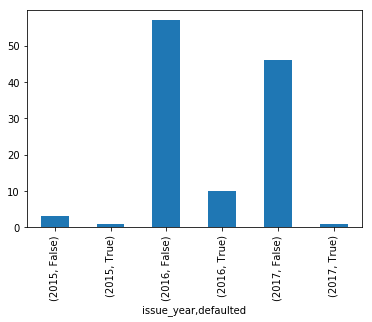

In [110]:
filtered.groupby(['issue_year', 'defaulted']).defaulted.count().plot.bar()

In [111]:
filtered.issue_year.value_counts()

2016    67
2017    47
2015     4
Name: issue_year, dtype: int64

In [112]:
default_by_year = filtered[['issue_year', 'note_id', 'defaulted']]\
.groupby('issue_year')\
.agg({
    'note_id': 'count',
    'defaulted': 'sum'
}).reset_index()[['issue_year', 'note_id', 'defaulted']]
default_by_year.columns = ['issue_year', 'note_count', 'default_count']
default_by_year.head()

,issue_year,note_count,default_count
0,2015,4,1.0
1,2016,67,10.0
2,2017,47,1.0


In [113]:
default_by_year['default_rate'] = default_by_year.default_count / default_by_year.note_count

In [114]:
default_by_year.head()

,issue_year,note_count,default_count,default_rate
0,2015,4,1.0,0.250000
1,2016,67,10.0,0.149254
2,2017,47,1.0,0.021277


In [115]:
defaults_yr_qtr = filtered[['issue_year', 'issue_quarter', 'note_id', 'defaulted']]\
.groupby(['issue_year', 'issue_quarter'])\
.agg({
    'note_id': 'count',
    'defaulted': 'sum'
}).reset_index()[['issue_year', 'issue_quarter', 'note_id', 'defaulted']]
defaults_yr_qtr.columns = ['issue_year', 'issue_quarter', 'note_count', 'default_count']
defaults_yr_qtr.head()

,issue_year,issue_quarter,note_count,default_count
0,2015,4,4,1.0
1,2016,1,18,4.0
2,2016,2,16,3.0
3,2016,3,20,2.0
4,2016,4,13,1.0


In [116]:
defaults_yr_qtr['default_rate'] = defaults_yr_qtr.default_count / defaults_yr_qtr.note_count
defaults_yr_qtr.head()

,issue_year,issue_quarter,note_count,default_count,default_rate
0,2015,4,4,1.0,0.250000
1,2016,1,18,4.0,0.222222
2,2016,2,16,3.0,0.187500
3,2016,3,20,2.0,0.100000
4,2016,4,13,1.0,0.076923


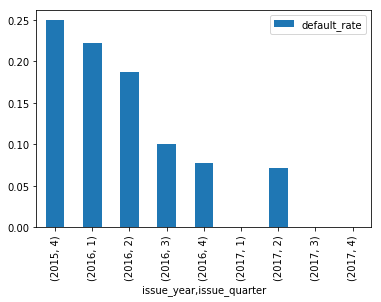

In [117]:
defaults_yr_qtr.plot.bar(x=['issue_year', 'issue_quarter'], y='default_rate')

In [118]:
def calc_average_age(dates):
    """Returns average age in days of loans"""
    days = [(arrow.now() - arrow.get(date)).days for date in dates]
    return sum(days) / len(days)

In [119]:
crit_2016 = filtered.issue_year == 2016
crit_2017 = filtered.issue_year == 2017

In [120]:
calc_average_age(filtered[crit_2016 | crit_2017].issue_date) / 30

12.51345029239766

In [121]:
loans_2016 = filtered[crit_2016]
loans_2017 = filtered[crit_2017]

In [122]:
calc_average_age(loans_2016.issue_date) / 30

17.738805970149254

In [123]:
calc_average_age(loans_2017.issue_date) / 30

5.064539007092198

In [124]:
loans_2016.principal.sum()

1675

In [125]:
loans_2017.principal.sum()

1175

In [126]:
filtered[crit_2016 | crit_2017].principal.sum()

2850